In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

iris = sns.load_dataset("iris")
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


<IPython.core.display.Javascript object>

In [3]:
X_train = iris[["petal_length"]]
y_train = iris["petal_width"]

# Reverse the correlation by sorting in opposite directions
# Will be a non-representative test set to demo -R^2
X_test = iris[["petal_length"]].sort_values("petal_length").reset_index(drop=True)
y_test = iris["petal_width"].sort_values(ascending=False).reset_index(drop=True)

<IPython.core.display.Javascript object>

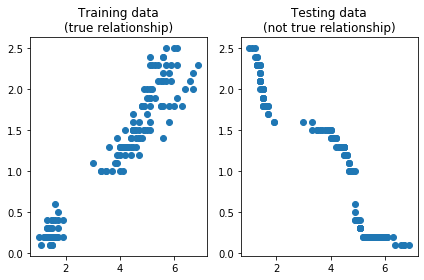

<IPython.core.display.Javascript object>

In [4]:
fig, axes = plt.subplots(1, 2)

axes[0].scatter(X_train, y_train)
axes[0].set_title("Training data\n(true relationship)")

axes[1].scatter(X_test, y_test)
axes[1].set_title("Testing data\n(not true relationship)")

plt.tight_layout()
plt.show()

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"train_score: {train_score}")
print(f"test_score: {test_score}")

train_score: 0.9271098389904927
test_score: -2.730791446432442


<IPython.core.display.Javascript object>

In [6]:
# Values that will be used in our R^2 calculation
y_true = y_test
y_pred = model.predict(X_test)
y_true_mean = y_true.mean()

<IPython.core.display.Javascript object>

$$R^2 = 1 - \frac{SS_{res}}{SS_{total}}$$

In [7]:
# R^2 code
# Simplified from sklearn source code:
# https://github.com/scikit-learn/scikit-learn/blob/95d4f0841/sklearn/metrics/_regression.py#L488

# SS Residual
numerator = np.sum((y_true - y_pred) ** 2)

# SS Total
denominator = np.sum((y_true - y_true_mean) ** 2)

1 - numerator / denominator

-2.730791446432442

<IPython.core.display.Javascript object>

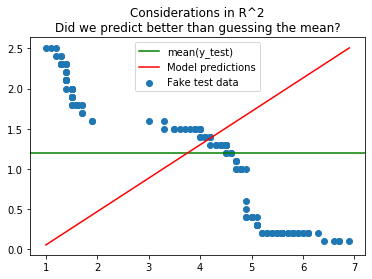

<IPython.core.display.Javascript object>

In [8]:
plt.scatter(X_test, y_test, label="Fake test data")
plt.axhline(y_true_mean, c="green", label="mean(y_test)")
plt.plot(X_test, y_pred, c="red", label="Model predictions")
plt.title("Considerations in R^2\nDid we predict better than guessing the mean?")
plt.legend()
plt.show()